In [1]:
import pandas as pd 
!pip  install openpyxl
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\tihit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\tihit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
data1=pd.read_csv('new_house price.csv', encoding='utf-8')
data1.rename(columns={'Unnamed: 1': 'country'}, inplace=True)

data1 = data1.drop(['2005', '2006', '2007', '2008', '2009', '2010'], axis=1)
data1 = data1[data1['country'] != 'United Kingdom']
print("Columns:", data1.columns.tolist())
data1.shape
data1.head()

Columns: ['geo', 'country', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


,geo,country,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AT,Austria,81.60,87.57,92.10,95.33,100,108.53,114.26,119.64,126.60,136.31,153.26
1,BE,Belgium,95.61,97.75,98.90,98.35,100,102.64,106.37,109.42,113.78,118.60,127.06
2,BG,Bulgaria,99.98,98.07,95.92,97.29,100,107.02,116.30,123.96,131.42,137.41,149.33
3,CY,Cyprus,111.09,107.70,103.29,101.47,100,100.27,102.52,104.32,108.20,107.98,104.33
4,CZ,Czech,95.30,93.90,93.90,96.20,100,107.20,119.70,130.00,141.90,153.90,184.20


In [ ]:
#data 2
file_path = r'Inflation-data______new.xlsx'
df = pd.read_excel(file_path, sheet_name=0)
df = df.drop(columns=[col for col in df.columns if isinstance(col, int) and (col < 2011 or col > 2021)])

# Displaying column names after keeping only years from 2010 to 2021
print("\n  Columns after keeping only years 2010 - 2021 ===")
print(list(df.columns))
countries_to_keep = [
    "Belgium", "Bulgaria", "Czechia", "Denmark", "Germany", "Estonia", "Ireland",
    "Greece", "Spain", "France", "Italy", "Latvia",
    "Lithuania", "Luxembourg", "Hungary", "Malta", "Netherlands", "Austria",
    "Poland", "Portugal", "Slovenia", "Slovakia", "Finland",
    "Sweden", "Iceland", "Norway"
]

df = df[df["Country"].isin(countries_to_keep)]
print(df["Country"].unique())
df = df.reset_index(drop=True)
df_2= df.drop(columns=["Country Code", "IMF Country Code", "Indicator Type"])
df_2 = df_2.rename(columns={'Country':'country'})
df_2.columns


  Columns after keeping only years 2010 - 2021 ===
['Country Code', 'IMF Country Code', 'Country', 'Indicator Type', 'Series Name', 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
['Austria' 'Belgium' 'Bulgaria' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands' 'Norway' 'Poland'
 'Portugal' 'Slovenia' 'Spain' 'Sweden']


Index([    'country', 'Series Name',          2011,          2012,
                2013,          2014,          2015,          2016,
                2017,          2018,          2019,          2020,
                2021],
      dtype='object')

In [28]:
#data from earnings
df = pd.read_csv('Earnings.csv')
# Drop unwanted year columns
newdf = df.drop(columns=['2005','2006','2007','2008','2009','2022','2023','2024'])
newdf = newdf.reset_index(drop=True)
# Drop specific rows (indices 11 and 13)
newdf = newdf.drop(index=[11,13])
newdf = newdf.rename(columns={'TIME':'country'})
# Drop the first row
newdf_3= newdf.drop(index=0).reset_index(drop=True)
print(newdf_3.head())
print("data1 cols:", data1.columns.tolist())
print("df cols:", df_2.columns.tolist())
print("new_df cols:", newdf_3.columns.tolist())


    country       2010       2011       2012       2013       2014       2015  \
0   Belgium  24,873.45  25,519.86  26,287.51  26,609.37  26,775.94  26,953.59   
1  Bulgaria   3,202.34   3,396.45   3,598.45   3,798.06   4,033.73   4,339.15   
2   Czechia   8,832.96   9,257.22   9,311.44   8,973.79   8,694.95   9,017.25   
3   Denmark  32,349.16  33,153.43  33,617.32  33,873.44  34,330.38  34,689.46   
4   Germany  25,374.06  26,088.04  26,729.62  27,171.02  27,791.42  28,410.71   

        2016       2017       2018       2019       2020       2021  
0  27,574.37  28,238.77  29,240.96  30,188.71  30,539.81  31,063.95  
1   4,689.05   5,132.74   5,447.10   6,093.02   6,612.77   7,456.68  
2   9,446.75  10,263.30  11,256.33  11,992.68  11,974.40  13,969.74  
3  35,021.65  35,558.92  36,307.24  37,133.59  37,878.85  39,315.61  
4  28,986.32  29,468.63  30,419.87  31,486.26  31,292.95  32,850.20  
data1 cols: ['geo', 'country', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'

merge data


In [ ]:
# Ensure consistent data types and strip spaces
data1['country'] = data1['country'].astype(str).str.strip()
df_2['country'] = df_2['country'].astype(str).str.strip()
newdf_3['country'] = newdf_3['country'].astype(str).str.strip()

# Merge house price and inflation
merged = pd.merge(data1, df_2, on='country', how='inner', suffixes=('_house_price', '_inflation'))
merged = pd.merge(merged, newdf_3, on='country', how='inner')
# Rename columns
new_columns = []
for col in merged.columns:
    col_str = str(col) 
    if col_str.endswith('_x'):
        new_columns.append(col_str.replace('_x', '_house_price'))
    elif col_str.endswith('_y'):
        new_columns.append(col_str.replace('_y', '_earning'))
    elif col_str.isdigit():
        new_columns.append(f"{col_str}_inflation")
    else:
        new_columns.append(col_str)  

merged.columns = new_columns
merged = merged.drop(['2010_inflation'], axis=1)

print("✅ Final columns:", merged.columns.tolist())
merged.head()

✅ Final columns: ['geo', 'country', '2011_house_price', '2012_house_price', '2013_house_price', '2014_house_price', '2015_house_price', '2016_house_price', '2017_house_price', '2018_house_price', '2019_house_price', '2020_house_price', '2021_house_price', 'Series Name', '2011_inflation', '2012_inflation', '2013_inflation', '2014_inflation', '2015_inflation', '2016_inflation', '2017_inflation', '2018_inflation', '2019_inflation', '2020_inflation', '2021_inflation', '2010_inflation', '2011_earning', '2012_earning', '2013_earning', '2014_earning', '2015_earning', '2016_earning', '2017_earning', '2018_earning', '2019_earning', '2020_earning', '2021_earning']


,geo,country,2011_house_price,2012_house_price,2013_house_price,2014_house_price,2015_house_price,2016_house_price,2017_house_price,2018_house_price,...,2012_earning,2013_earning,2014_earning,2015_earning,2016_earning,2017_earning,2018_earning,2019_earning,2020_earning,2021_earning
0,AT,Austria,81.60,87.57,92.10,95.33,100,108.53,114.26,119.64,...,"26,893.06","27,520.54","27,965.34","28,524.14","30,601.53","31,083.14","31,640.93","32,325.12","33,032.37","33,712.20"
1,BE,Belgium,95.61,97.75,98.90,98.35,100,102.64,106.37,109.42,...,"26,287.51","26,609.37","26,775.94","26,953.59","27,574.37","28,238.77","29,240.96","30,188.71","30,539.81","31,063.95"
2,BG,Bulgaria,99.98,98.07,95.92,97.29,100,107.02,116.30,123.96,...,"3,598.45","3,798.06","4,033.73","4,339.15","4,689.05","5,132.74","5,447.10","6,093.02","6,612.77","7,456.68"
3,DE,Germany,86.80,89.80,92.60,95.50,100,107.50,114.10,121.70,...,"26,729.62","27,171.02","27,791.42","28,410.71","28,986.32","29,468.63","30,419.87","31,486.26","31,292.95","32,850.20"
4,EE,Estonia,69.32,74.37,82.29,93.58,100,104.75,110.51,117.07,...,"8,812.65","9,445.70","9,914.95","10,638.42","11,454.71","12,233.44","13,437.69","14,169.60","14,444.62","15,300.44"


In [10]:
# Convert wide to long for house prices, inflation, and earnings
house_price = merged.melt(id_vars=['geo','country'], 
                          value_vars=[col for col in merged.columns if 'house_price' in col],
                          var_name='year', value_name='house_price')

inflation = merged.melt(id_vars=['geo','country'], 
                        value_vars=[col for col in merged.columns if 'inflation' in col],
                        var_name='year', value_name='inflation')

earning = merged.melt(id_vars=['geo','country'], 
                      value_vars=[col for col in merged.columns if 'earning' in col],
                      var_name='year', value_name='earning')

# Clean up year column
for df in [house_price, inflation, earning]:
    df['year'] = df['year'].str.extract(r'(\d{4})').astype(int)
df['earning'] = df['earning'].replace({',': ''}, regex=True).astype(float)

# Merge them together
df_long = house_price.merge(inflation, on=['geo','country','year']).merge(earning, on=['geo','country','year'])
df_long.rename(columns={"house_price":"house_price_index"},inplace=True)
df_long.head(15)


,geo,country,year,house_price_index,inflation,earning
0,AT,Austria,2011,81.60,1.833637,26375.67
1,BE,Belgium,2011,95.61,1.807151,25519.86
2,BG,Bulgaria,2011,99.98,5.941922,3396.45
3,DE,Germany,2011,86.80,1.079937,26088.04
4,EE,Estonia,2011,69.32,5.399596,8324.26
5,ES,Spain,2011,124.27,-0.020117,19891.57
6,FI,Finland,2011,96.87,2.623597,28421.92
7,FR,France,2011,105.46,0.948142,25576.25
8,HU,Hungary,2011,90.45,1.927564,6146.32
9,IE,Ireland,2011,87.86,1.315972,31159.23


# queastion 1
# What is the trend of house prices index?”,


growth rate of house prices vs growth rate of earnings and  “Will prices remain affordable? Price - to - income ratio (PIR)


In [11]:

# Calculate the price-to-income ratio
df_long['price_to_income_ratio'] = (df_long['house_price_index'] / df_long['earning']).round(2)
df_long['real_hpi']=df_long['house_price_index']/(1 + df_long['inflation']/100)
df_long['price_to_real_income_ratio'] = (df_long['house_price_index'] / df_long['real_hpi']).round(2)
# Display the first few rows to verify
df_long[['geo', 'country', 'year', 'house_price_index','earning','price_to_real_income_ratio','price_to_income_ratio']].head(29)

,geo,country,year,house_price_index,earning,price_to_real_income_ratio,price_to_income_ratio
0,AT,Austria,2011,81.60,26375.67,1.02,0.00
1,BE,Belgium,2011,95.61,25519.86,1.02,0.00
2,BG,Bulgaria,2011,99.98,3396.45,1.06,0.03
3,DE,Germany,2011,86.80,26088.04,1.01,0.00
4,EE,Estonia,2011,69.32,8324.26,1.05,0.01
5,ES,Spain,2011,124.27,19891.57,1.00,0.01
6,FI,Finland,2011,96.87,28421.92,1.03,0.00
7,FR,France,2011,105.46,25576.25,1.01,0.00
8,HU,Hungary,2011,90.45,6146.32,1.02,0.01
9,IE,Ireland,2011,87.86,31159.23,1.01,0.00


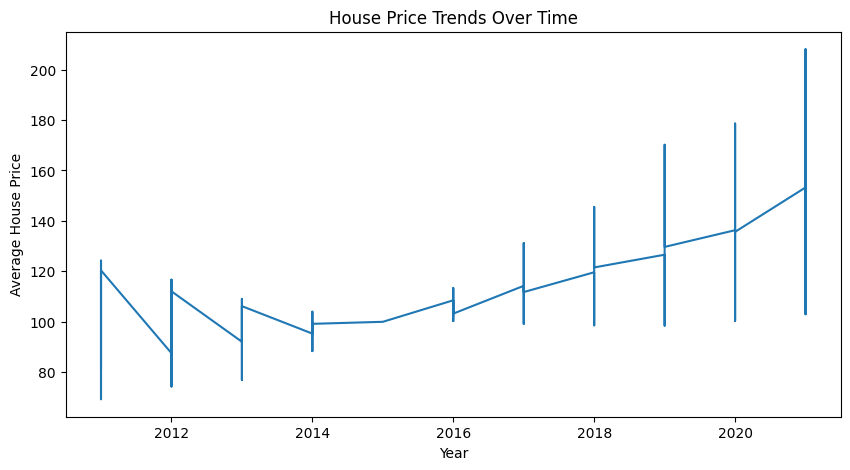

In [29]:
plt.figure(figsize=(10,5))
plt.plot(df_long['year'], df_long['house_price_index'])
plt.title("House Price Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Average House Price")
plt.show()


# Income vs Price Growth (Affordability)
"Next, we compare average incomes with house prices to measure affordability.

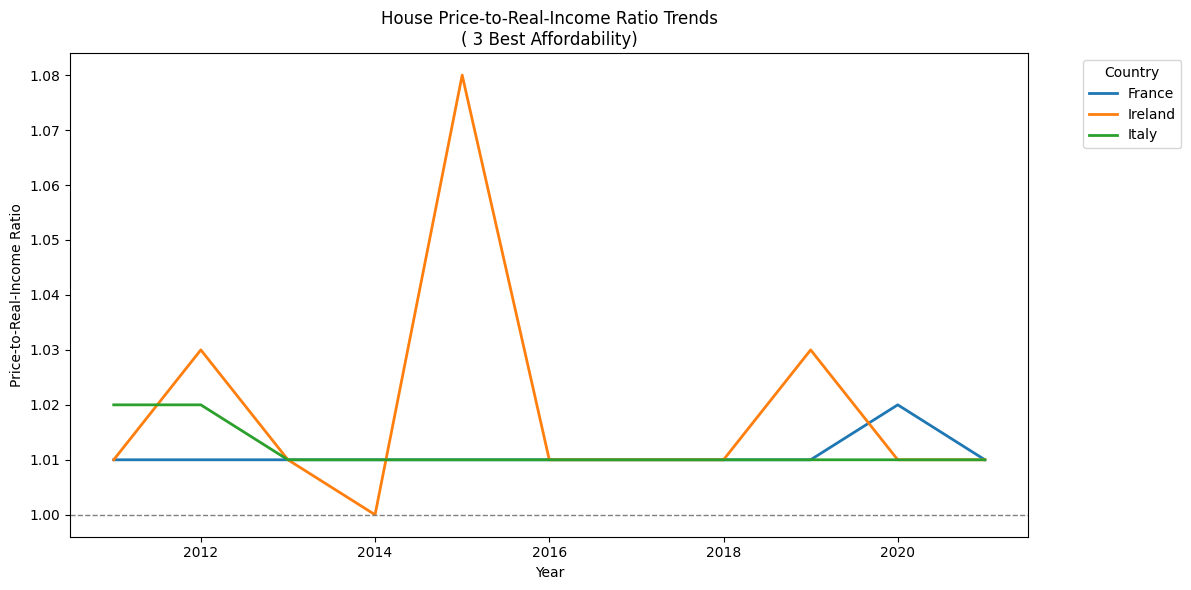

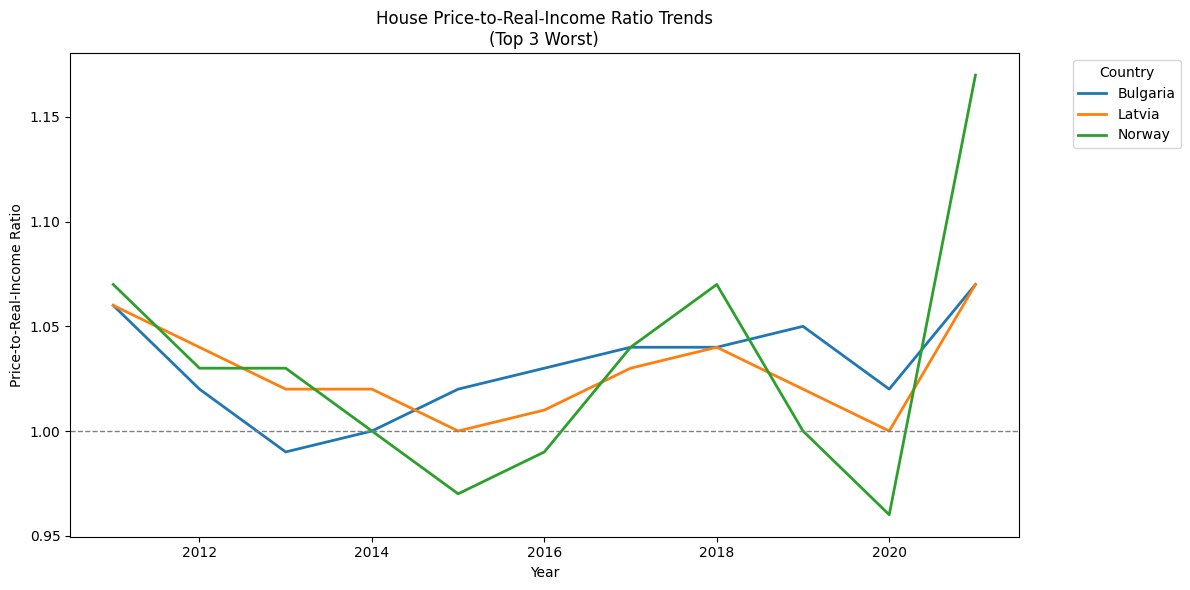

In [13]:
# Take latest year (or use mean across all years)
latest_year = df_long['year'].max()
df_latest = df_long[df_long['year'] == latest_year]

# Top 5 (worst affordability → highest ratio)
top_countries = df_latest.groupby('country')['price_to_real_income_ratio'].mean().nlargest(3).index

# Bottom 5 (best affordability → lowest ratio)
bottom_countries = df_latest.groupby('country')['price_to_real_income_ratio'].mean().nsmallest(3).index

df_bottom_countries = df_long[df_long['country'].isin(bottom_countries)]
df_bottom_countries
df_top_countries = df_long[df_long['country'].isin(top_countries)]
df_top_countries
# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_bottom_countries, x='year', y='price_to_real_income_ratio', hue='country', linewidth=2)
plt.axhline(1.0, color='gray', linestyle='--', linewidth=1)

plt.title("House Price-to-Real-Income Ratio Trends\n( 3 Best Affordability)")
plt.xlabel("Year")
plt.ylabel("Price-to-Real-Income Ratio")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#########################################################################################
plt.figure(figsize=(12,6))
sns.lineplot(data=df_top_countries, x='year', y='price_to_real_income_ratio', hue='country', linewidth=2)
# Reference line (balanced affordability)
plt.axhline(1.0, color='gray', linestyle='--', linewidth=1)

plt.title("House Price-to-Real-Income Ratio Trends\n(Top 3 Worst)")
plt.xlabel("Year")
plt.ylabel("Price-to-Real-Income Ratio")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# how earning and house price index correlate 
they have negative relation which mean 

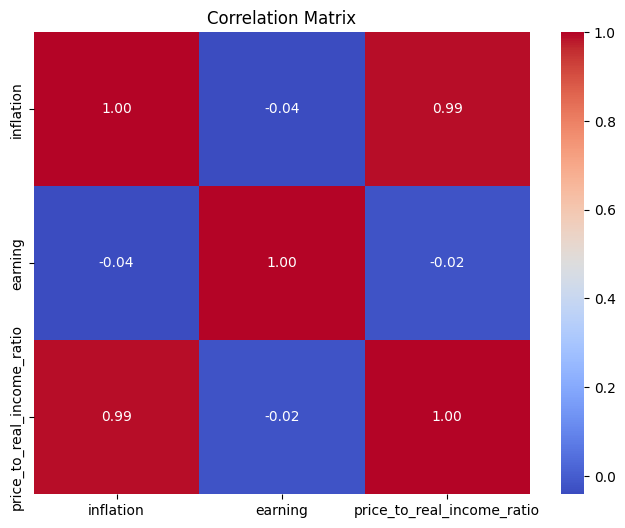

In [30]:
# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df_long[['inflation', 'earning', 'price_to_real_income_ratio']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Negative correlation between house prices and real income/earnings = housing is becoming less affordable relative to what people actually earn

In [15]:
df_long['hpi_growth'] = df_long.groupby('geo')['house_price_index'].pct_change() * 100
df_long['income_growth'] = df_long.groupby('geo')['earning'].pct_change() * 100
df_long.tail(10)


,geo,country,year,house_price_index,inflation,earning,price_to_income_ratio,real_hpi,price_to_real_income_ratio,hpi_growth,income_growth
232,LT,Lithuania,2021,163.84,6.508053,11798.21,0.01,153.828744,1.07,16.050432,9.368560
233,LU,Luxembourg,2021,172.15,6.181292,44934.82,0.00,162.128371,1.06,13.916093,1.263118
234,LV,Latvia,2021,161.65,6.881442,11229.49,0.01,151.242346,1.07,10.893874,14.740713
235,MT,Malta,2021,135.44,1.810518,18292.50,0.01,133.031442,1.02,5.106317,-6.922134
236,NL,Netherlands,2021,164.21,2.524821,40660.61,0.00,160.166092,1.03,15.033275,3.877437
237,NO,Norway,2021,137.66,16.911350,46935.39,0.00,117.747336,1.17,9.158671,10.345624
238,PL,Poland,2021,147.77,5.052506,11134.57,0.01,140.662994,1.05,9.168144,-2.125286
239,PT,Portugal,2021,168.84,1.398792,13502.54,0.01,166.510860,1.01,9.401931,4.389325
240,SE,Sweden,2021,134.46,2.976153,35485.73,0.00,130.573920,1.03,10.113832,6.350797
241,SI,Slovenia,2021,151.32,2.607087,14601.22,0.01,147.475193,1.03,11.543565,5.069012


Inflation vs house prices (real_hpi, hpi_growth) → checks if inflation drives nominal prices up.
- **HPI** measures housing price changes relative to a base year (10).  
- It’s **nominal**, meaning it includes inflation effects.  
- To see the *true* change in housing values, we adjust for inflation:

- **Nominal HPI** shows observed price growth.  
- **Real HPI** shows actual value growth, removing inflation’s effect.  
- This is key for testing how much housing prices rise due to the market vs. inflation.  

Income growth vs house price growth → shows if house prices are growing faster than earnings (key for affordability

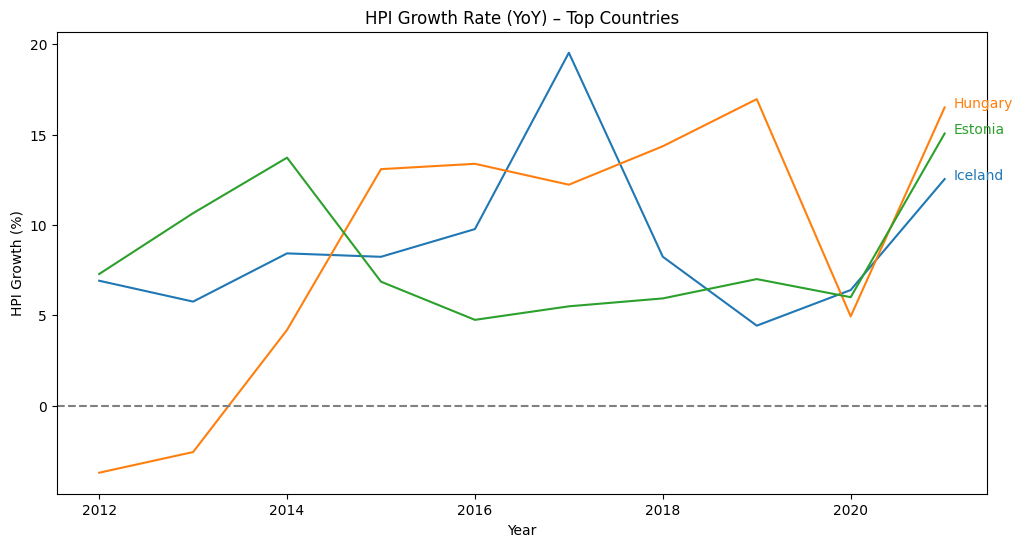

In [16]:
top_countries = df_long.groupby('country')['hpi_growth'].mean().nlargest(3).index
df_top = df_long[df_long['country'].isin(top_countries)]

# Set color palette
palette = sns.color_palette("tab10", n_colors=len(top_countries))

plt.figure(figsize=(12,6))

for i, country in enumerate(top_countries):
    df_country = df_top[df_top['country'] == country]
    plt.plot(df_country['year'], df_country['hpi_growth'], color=palette[i], label=country)
    plt.text(df_country['year'].max()+0.1, df_country['hpi_growth'].iloc[-1], country, color=palette[i])

# Add 0% horizontal line
plt.axhline(0, color='gray', linestyle='--')

plt.title('HPI Growth Rate (YoY) – Top Countries')
plt.xlabel('Year')
plt.ylabel('HPI Growth (%)')
plt.show()

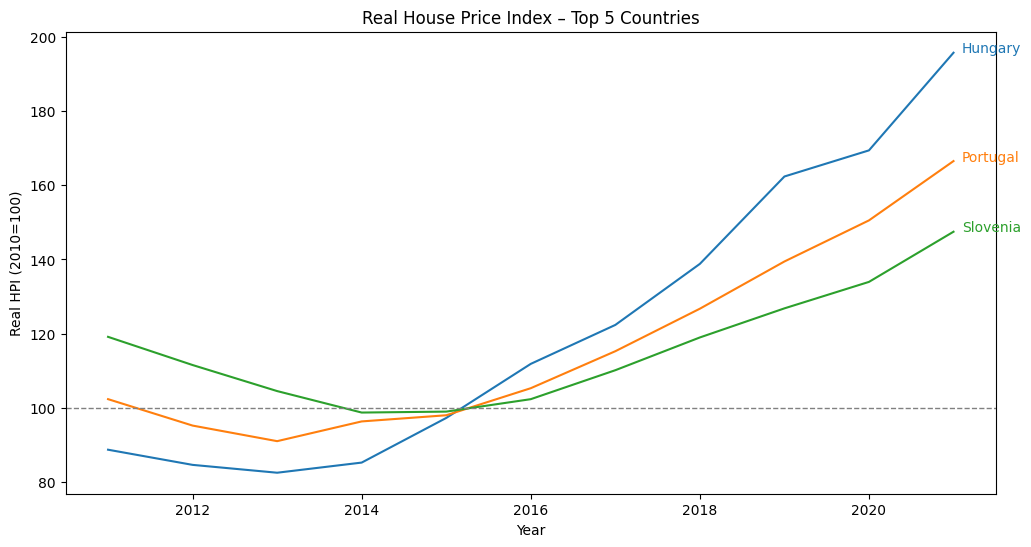

In [17]:
top_countries = df_long.groupby('country')['real_hpi'].mean().nlargest(3).index
df_top = df_long[df_long['country'].isin(top_countries)]

palette = sns.color_palette("tab10", n_colors=len(top_countries))

plt.figure(figsize=(12,6))

for i, country in enumerate(top_countries):
    df_country = df_top[df_top['country'] == country]
    plt.plot(df_country['year'], df_country['real_hpi'], color=palette[i])
    plt.text(df_country['year'].max()+0.1,
             df_country['real_hpi'].iloc[-1],
             country, color=palette[i])

plt.axhline(100, color='gray', linestyle='--', linewidth=1)
plt.title('Real House Price Index – Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Real HPI (2010=100)')
plt.show()

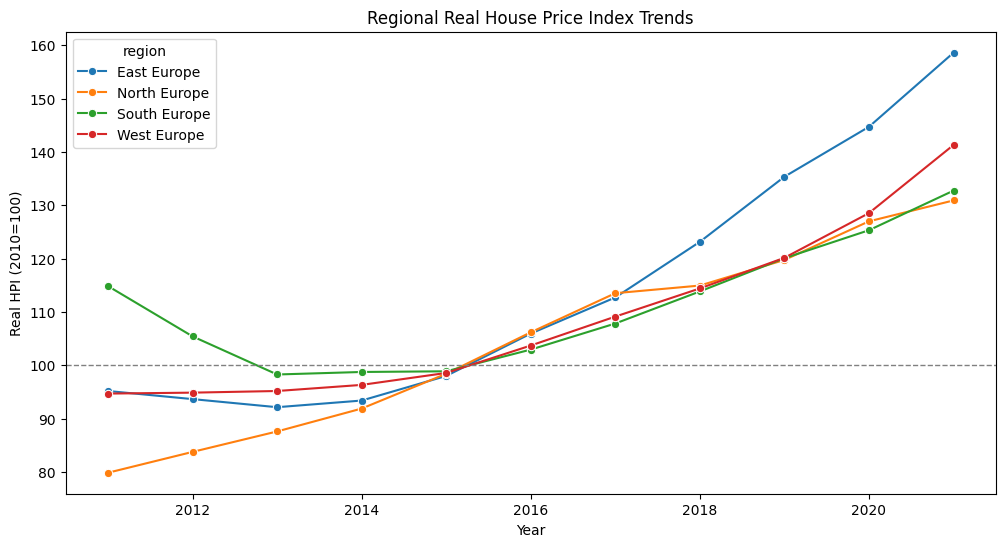

In [18]:
# Map countries to regions
country_to_region = {
    'Iceland':'North Europe','Norway':'North Europe','Sweden':'North Europe','Denmark':'North Europe','Finland':'North Europe',
    'Spain':'South Europe','Italy':'South Europe','Portugal':'South Europe','Greece':'South Europe',
    'Germany':'West Europe','France':'West Europe','Netherlands':'West Europe','Belgium':'West Europe','Austria':'West Europe',
    'Poland':'East Europe','Hungary':'East Europe','Czech Republic':'East Europe','Slovakia':'East Europe','Romania':'East Europe','Bulgaria':'East Europe'
}
df_long['region'] = df_long['country'].map(country_to_region)

# Regional averages
df_region = df_long.groupby(['region','year'])['real_hpi'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_region, x='year', y='real_hpi', hue='region', marker='o')
plt.axhline(100, color='gray', linestyle='--', linewidth=1)
plt.title('Regional Real House Price Index Trends')
plt.xlabel('Year')
plt.ylabel('Real HPI (2010=100)')
plt.show()


# question 3
# inflation vs house price and how are there correlation

Inflation has a moderate positive impact on house prices, but it’s not the only factor influencing them

C:\Users\tihit\AppData\Local\Temp\ipykernel_23880\813832528.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


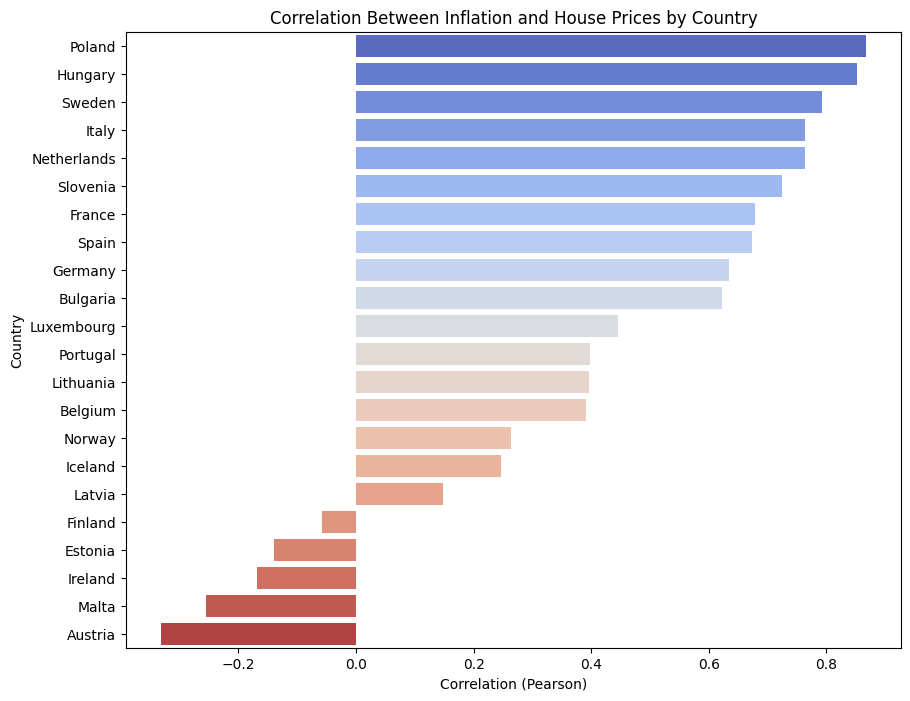

In [19]:
# Calculate correlation per country
country_corr = (
    df_long.groupby("country")[["house_price_index", "inflation"]]
    .corr()
    .reset_index()
)

# Keep only correlations between house_price and inflation
country_corr = country_corr[country_corr["level_1"] == "inflation"]
country_corr = country_corr.rename(columns={"house_price_index": "correlation"})

# Sort countries by correlation value
country_corr = country_corr.sort_values("correlation", ascending=False)

# Plot correlation per country
plt.figure(figsize=(10, 8))
sns.barplot(
    data=country_corr,
    x="correlation",
    y="country",
    palette="coolwarm"
)
plt.title("Correlation Between Inflation and House Prices by Country")
plt.xlabel("Correlation (Pearson)")
plt.ylabel("Country")
plt.show()




General Conclusions

Central & Eastern Europe (e.g., Poland, Hungary) → most sensitive: housing markets quickly react to inflation.

Western Europe (e.g., Austria, Belgium, Luxembourg) → more stable: high wages, better credit access, and more regulated housing sectors dampen the inflation effect.

Nordic countries → mixed picture: Sweden reacts strongly, while Norway, Iceland, and Finland are more resilient.

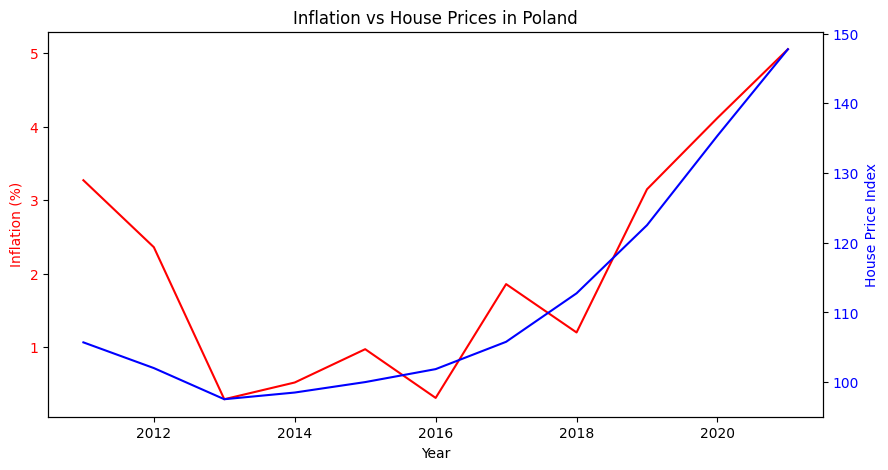

In [20]:
country = "Poland"
df_country = df_long[df_long["country"] == country]

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title(f"Inflation vs House Prices in {country}")
ax1.set_xlabel("Year")
ax1.plot(df_country["year"], df_country["inflation"], color="red", label="Inflation (%)")
ax1.set_ylabel("Inflation (%)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

ax2 = ax1.twinx()
ax2.plot(df_country["year"], df_country["house_price_index"], color="blue", label="House Price Index")
ax2.set_ylabel("House Price Index", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")
plt.show()


In Poland, rising inflation after 2016 is closely linked to a strong increase in house prices, showing a positive relationship between the two.

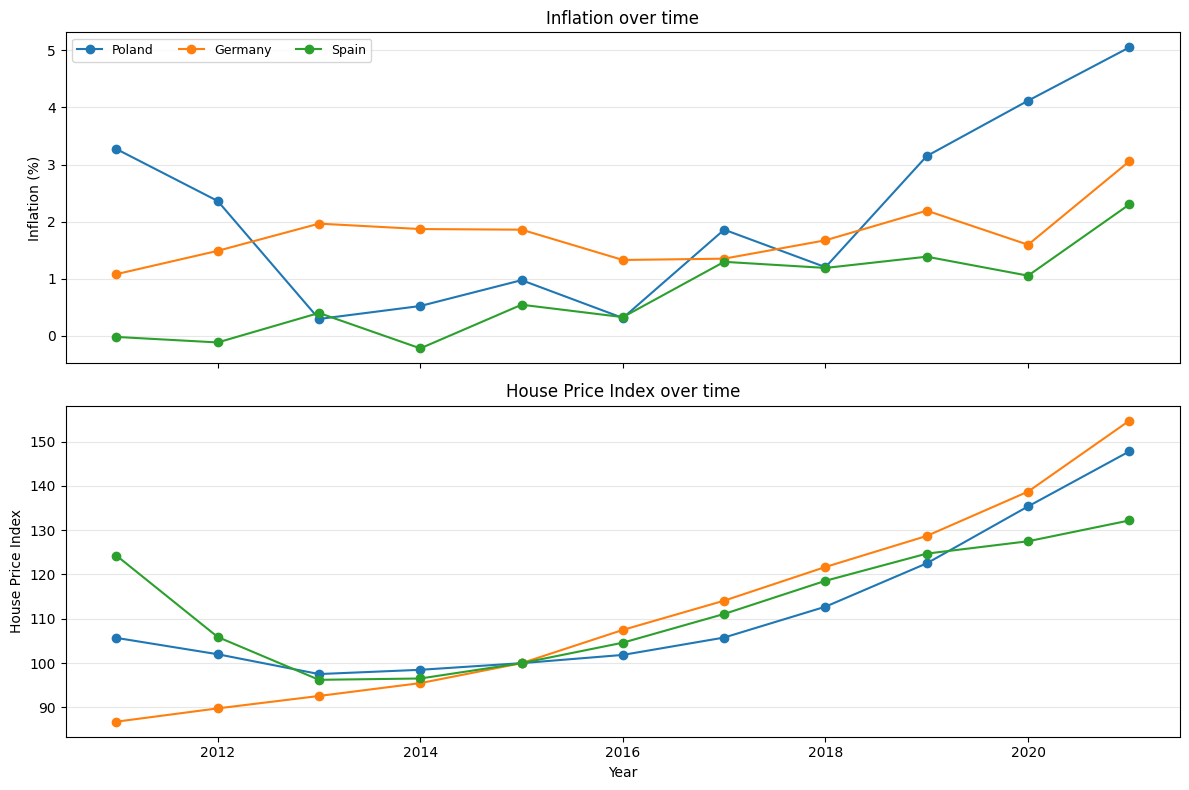

In [21]:


def plot_multi_country(countries):
    sel = df_long[df_long["country"].isin(countries)].copy()
    sel = sel.sort_values(["country","year"])

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # --- Inflacja ---
    for c in countries:
        d = sel[sel.country == c]
        axes[0].plot(d["year"], d["inflation"], marker="o", label=c)
    axes[0].set_title("Inflation over time")
    axes[0].set_ylabel("Inflation (%)")
    axes[0].grid(axis="y", alpha=0.3)
    axes[0].legend(ncol=3, fontsize=9)

    # --- House Price Index ---
    for c in countries:
        d = sel[sel.country == c]
        axes[1].plot(d["year"], d["house_price_index"], marker="o", label=c)
    axes[1].set_title("House Price Index over time")
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("House Price Index")
    axes[1].grid(axis="y", alpha=0.3)

    plt.tight_layout()
    plt.show()

# przykład
plot_multi_country(["Poland", "Germany", "Spain"])


coulusion

In Poland and Germany, rising inflation after 2016 is linked to a strong increase in house prices.

In Spain, house prices recovered more slowly despite moderate inflation.

This shows that while inflation influences housing prices, other factors — like demand, wages, and housing supply — also play a big role.

# forcast for the next 5 year

C:\Users\tihit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\tihit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\tihit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, 

                               SARIMAX Results                                
Dep. Variable:      house_price_index   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -15.582
Date:                Mon, 25 Aug 2025   AIC                             37.164
Time:                        20:56:19   BIC                             37.001
Sample:                             0   HQIC                            35.158
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.075     13.294      0.000       0.853       1.147
ma.L1         -0.9813     42.156     -0.023      0.981     -83.606      81.643
sigma2         2.7538    113.477      0.024      0.9

C:\Users\tihit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\tihit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


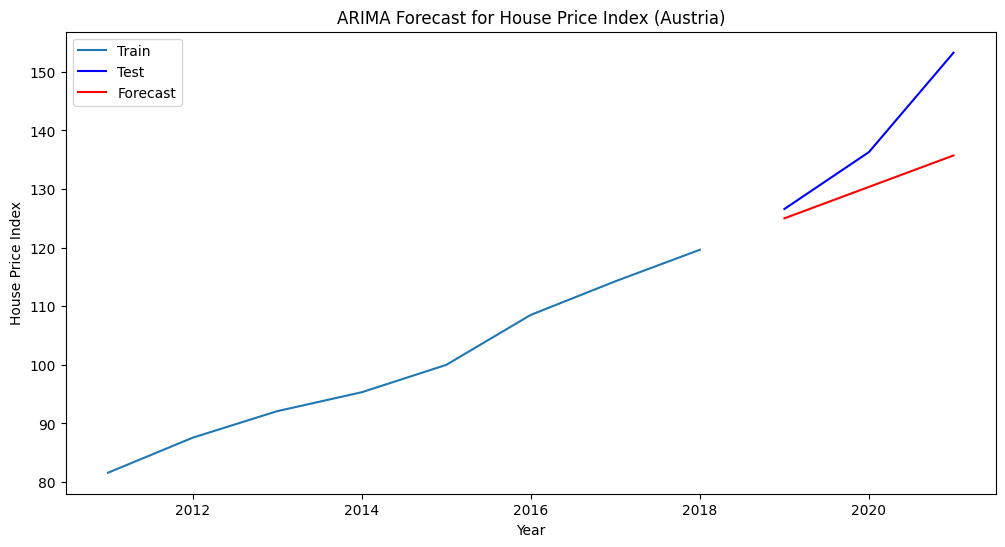

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Filter data for Austria
country_data = df_long[df_long['country'] == 'Austria']
country_data = country_data.set_index('year')

# Select the series
time_series = country_data['house_price_index']

# -------------------
# Train-Test Split
# -------------------
train_size = int(len(time_series) * 0.8)  # 80% train, 20% test
train, test = time_series.iloc[:train_size], time_series.iloc[train_size:]

# -------------------
# Fit ARIMA on training set
# -------------------
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast the test period
forecast = model_fit.forecast(steps=len(test))

# -------------------
# Accuracy metrics
# -------------------
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="blue")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.title("ARIMA Forecast for House Price Index (Austria)")
plt.xlabel("Year")
plt.ylabel("House Price Index")
plt.legend()
plt.show()



The ARIMA model forecasts continued growth, with prices expected to rise by 8% annually. By 2027, the average house price may reach 140% of today’s level.”
